<a href="https://colab.research.google.com/github/iiCellxx/CSEL-303/blob/main/Task2_ALMARIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cel Rick D. Almario BSCS 3B

Task 2:

Predator-Prey System with Discrete Harvesting Events

Scenario: A Lotka-Volterra predator-prey model, where predators and prey follow continuous population dynamics, but at specific time steps, humans introduce discrete harvesting events to control the predator population.

Steps:

1. Define the Lotka-Volterra equations for predator-prey interaction.

2. Introduce discrete-time harvesting events that reduce the predator population.

3. Implement the model using MATLAB or Python (SciPy/Odeint for ODEs, event-based logic for harvesting).

4. Analyze how harvesting affects system stability.

# Step 1: Import Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


# Step 2: Define the Lotka-Volterra Predator-Prey Model

In [2]:
def predator_prey(y, t, alpha, beta, delta, gamma):
    """
    Defines the Lotka-Volterra predator-prey equations.

    Parameters:
        y (list): Current populations [prey, predator]
        t (float): Current time step
        alpha (float): Prey birth rate
        beta (float): Predation rate
        delta (float): Predator reproduction rate
        gamma (float): Predator death rate

    Returns:
        dydt (list): Change rates [dPrey/dt, dPredator/dt]
    """
    prey, predator = y
    dydt = [
        alpha * prey - beta * prey * predator,  # Prey growth
        delta * prey * predator - gamma * predator  # Predator growth
    ]
    return dydt


# Step 3: Define a Function for Discrete Harvesting

In [3]:
def apply_harvesting(predator_population, time_points, harvest_interval, harvest_amount):
    """
    Applies discrete harvesting events at specific time intervals.

    Parameters:
        predator_population (numpy array): Predator population over time
        time_points (numpy array): Time values
        harvest_interval (int): Time step interval for harvesting
        harvest_amount (float): Number of predators to remove at each harvest

    Returns:
        numpy array: Adjusted predator population
    """
    for i in range(len(time_points)):
        if int(time_points[i]) % harvest_interval == 0:
            predator_population[i] = max(0, predator_population[i] - harvest_amount)
    return predator_population


# Step 4: Define a Class for the Simulation

In [4]:
class PredatorPreySimulation:
    def __init__(self, alpha, beta, delta, gamma, prey_0, predator_0, t_max, steps):
        """
        Initializes the Predator-Prey Simulation parameters.

        Parameters:
            alpha (float): Prey birth rate
            beta (float): Predation rate
            delta (float): Predator reproduction rate
            gamma (float): Predator death rate
            prey_0 (int): Initial prey population
            predator_0 (int): Initial predator population
            t_max (int): Maximum simulation time
            steps (int): Number of time steps
        """
        self.alpha = alpha
        self.beta = beta
        self.delta = delta
        self.gamma = gamma
        self.prey_0 = prey_0
        self.predator_0 = predator_0
        self.t_max = t_max
        self.steps = steps
        self.time_points = np.linspace(0, t_max, steps)

    def run_simulation(self):
        """
        Solves the Lotka-Volterra equations using odeint.

        Returns:
            tuple: (time_points, prey_population, predator_population)
        """
        y0 = [self.prey_0, self.predator_0]
        solution = odeint(
            predator_prey, y0, self.time_points,
            args=(self.alpha, self.beta, self.delta, self.gamma)
        )
        return self.time_points, solution[:, 0], solution[:, 1]

    def apply_harvesting(self, predator_population, harvest_interval, harvest_amount):
        """
        Applies harvesting to the predator population.

        Returns:
            numpy array: Adjusted predator population after harvesting.
        """
        return apply_harvesting(predator_population, self.time_points, harvest_interval, harvest_amount)


# Step 5: Run the Simulation

In [5]:
# Model Parameters
alpha = 0.1    # Prey birth rate
beta = 0.02    # Predation rate
delta = 0.01   # Predator reproduction rate
gamma = 0.1    # Predator death rate

# Initial Conditions
prey_0 = 40
predator_0 = 9

# Simulation Settings
t_max = 200   # Maximum time
steps = 1000  # Number of time steps

# Harvesting Settings
harvest_interval = 50  # Apply harvesting every 50 time units
harvest_amount = 2     # Remove 2 predators at each harvest event

# Create and Run the Simulation
sim = PredatorPreySimulation(alpha, beta, delta, gamma, prey_0, predator_0, t_max, steps)
time_points, prey_population, predator_population = sim.run_simulation()

# Apply Harvesting
predator_population_harvested = sim.apply_harvesting(predator_population, harvest_interval, harvest_amount)


# Step 6: Plot the Results

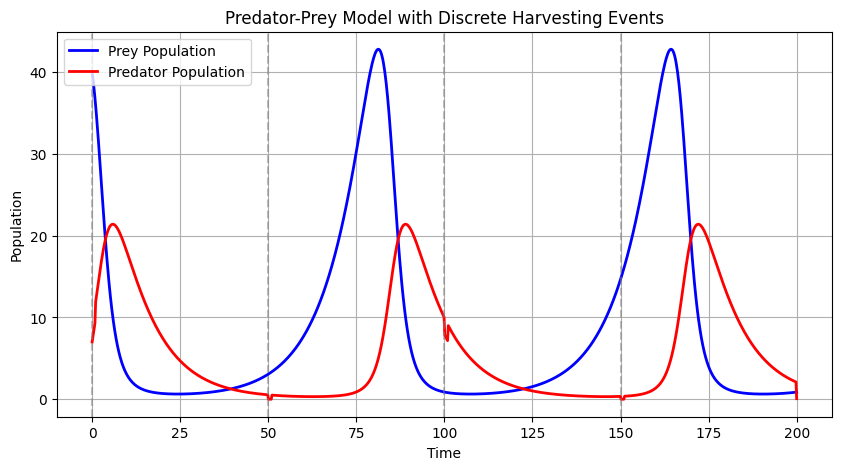

In [6]:
def plot_results(time_points, prey_population, predator_population, harvest_intervals):
    """
    Plots the predator-prey population dynamics.

    Parameters:
        time_points (numpy array): Time steps
        prey_population (numpy array): Population of prey over time
        predator_population (numpy array): Population of predators over time
        harvest_intervals (list): List of time points where harvesting occurs
    """
    plt.figure(figsize=(10, 5))
    plt.plot(time_points, prey_population, label="Prey Population", color="blue", linewidth=2)
    plt.plot(time_points, predator_population, label="Predator Population", color="red", linewidth=2)

    # Add vertical lines for harvesting events
    for t in range(0, int(max(time_points)), harvest_intervals):
        plt.axvline(x=t, color="gray", linestyle="--", alpha=0.5)

    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.title("Predator-Prey Model with Discrete Harvesting Events")
    plt.legend()
    plt.grid()
    plt.show()

# Plot the results
plot_results(time_points, prey_population, predator_population_harvested, harvest_interval)
